In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.drop(['car_ID'], axis = 1, inplace = True)

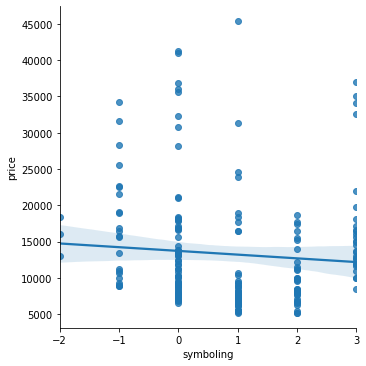

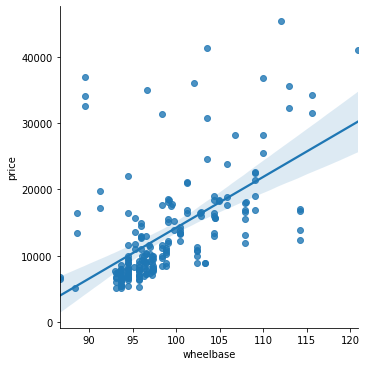

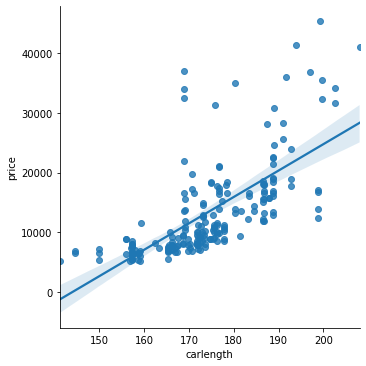

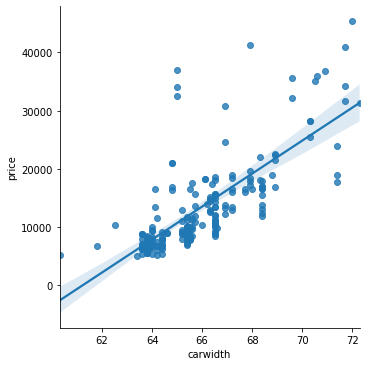

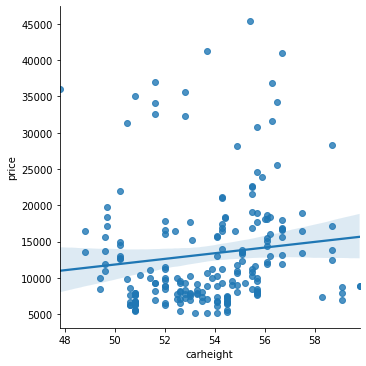

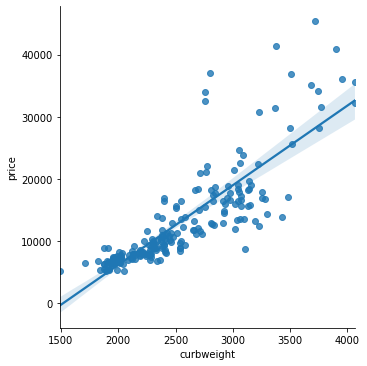

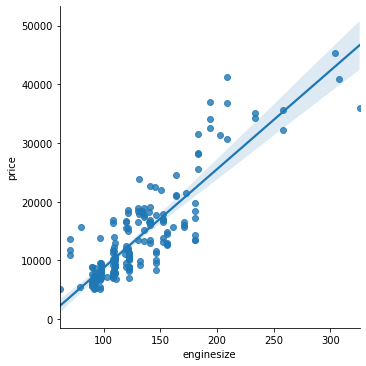

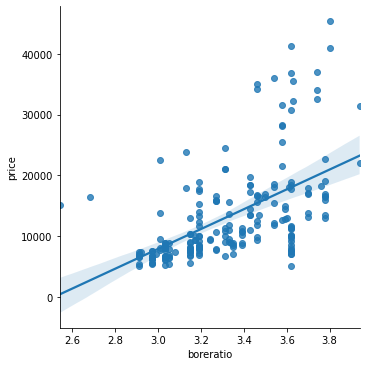

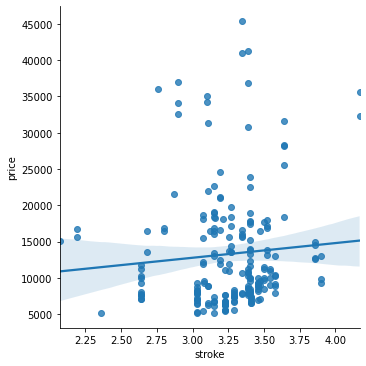

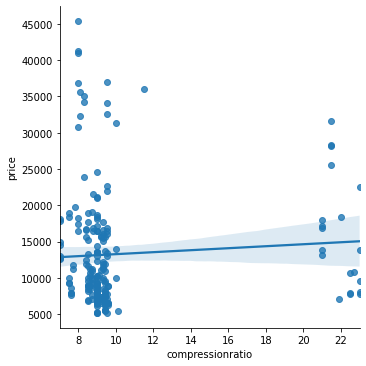

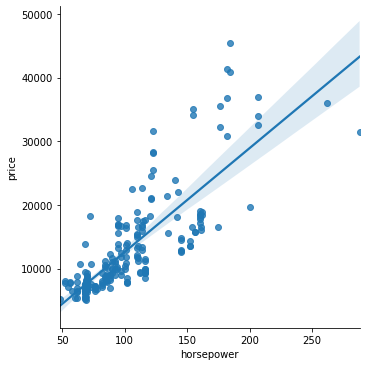

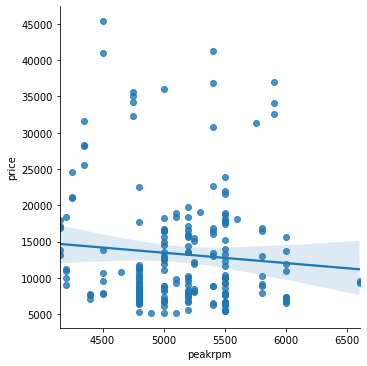

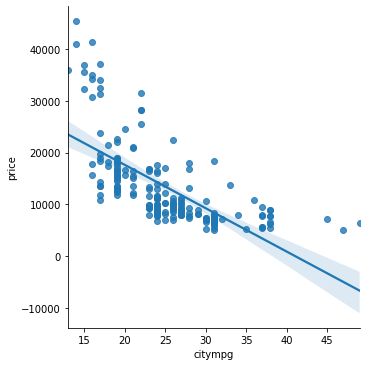

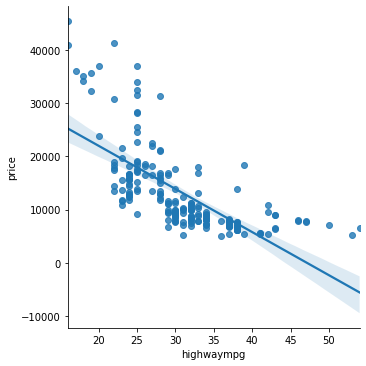

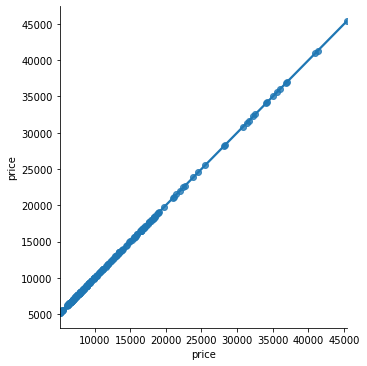

In [6]:
#Visualize some relationships
for col in df.columns: 
    if df[col].dtypes != 'object':
        sns.lmplot(data = df, x = col, y = 'price')

In [7]:
#To drop because uncorrelated to price: 
to_drop = ['peakrpm', 'compressionratio', 'stroke', 'symboling']
df.drop(df[to_drop], axis = 1, inplace = True)

In [8]:
categorical = []
numerical = []
for col in df.columns: 
    if df[col].dtypes == 'object':
        categorical.append(col)
    else: 
        numerical.append(col)

In [9]:
categorical

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [10]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
df['CarName'] = df['CarName'].apply(lambda x: x.split()[0])
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


<AxesSubplot:xlabel='CarName', ylabel='count'>

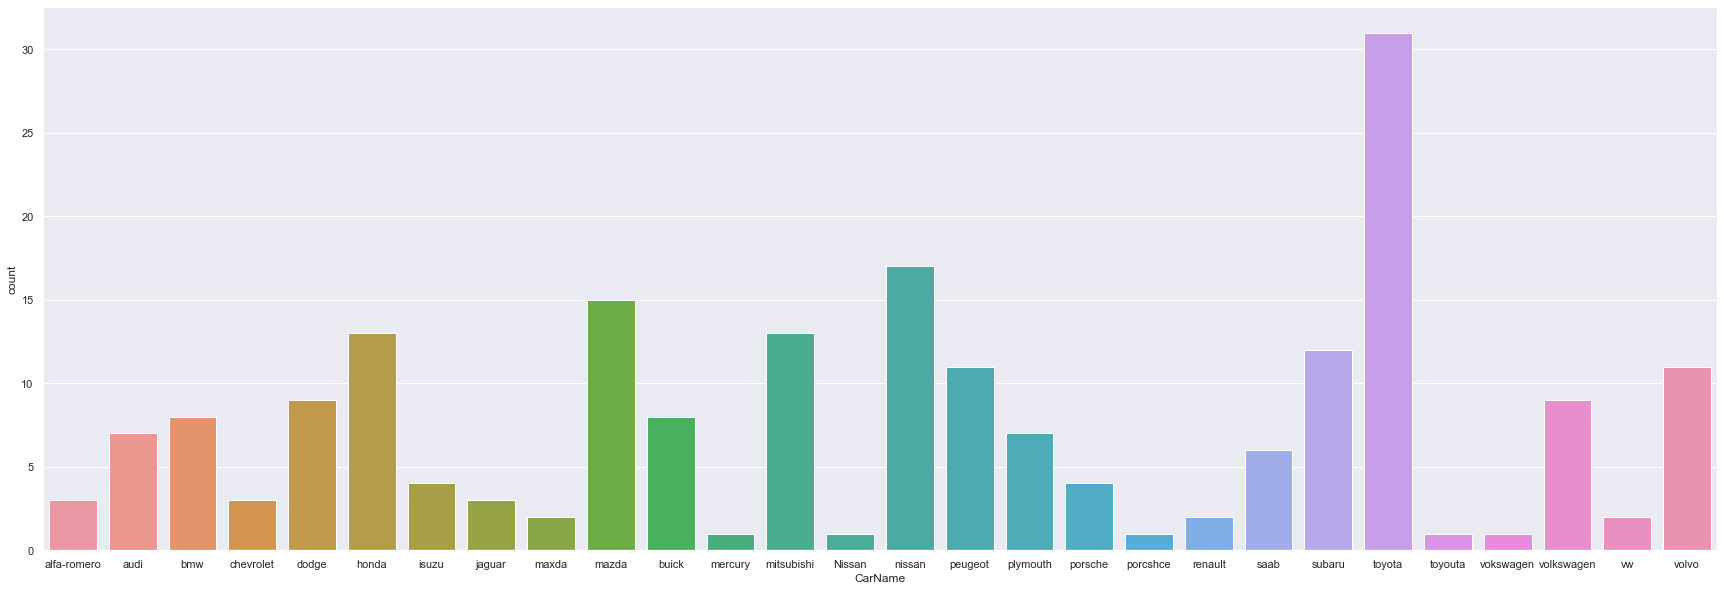

In [12]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(data = df, x='CarName')

In [13]:
df['CarName'] = df['CarName'].str.lower()
df['CarName'] = df['CarName'].replace({'vw':'volkswagen','vokswagen':'volkswagen','toyouta':'toyota','maxda':'mazda','porcshce':'porsche'})

<AxesSubplot:xlabel='CarName', ylabel='count'>

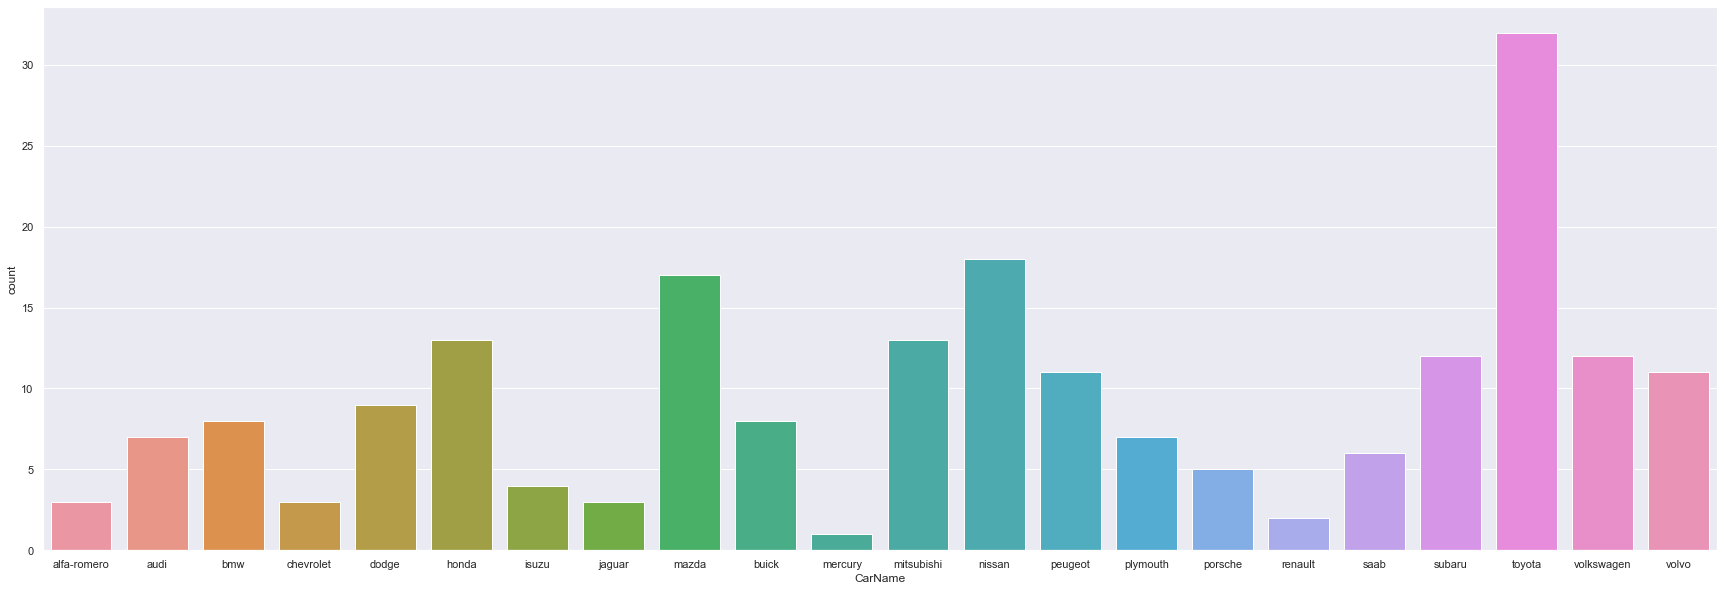

In [14]:
sns.countplot(data = df, x='CarName')

In [15]:
#Create dummies, and numerical features
x1 = pd.get_dummies(df[categorical], drop_first = False)
x2 = df[numerical]
X = pd.concat([x2,x1], axis = 1)
X.drop('price', axis = 1, inplace = True)
X.to_csv('dummy_df')
cols_to_use = X.columns
X.to_csv('cols_to_use')
X = X.values

<AxesSubplot:xlabel='price', ylabel='Count'>

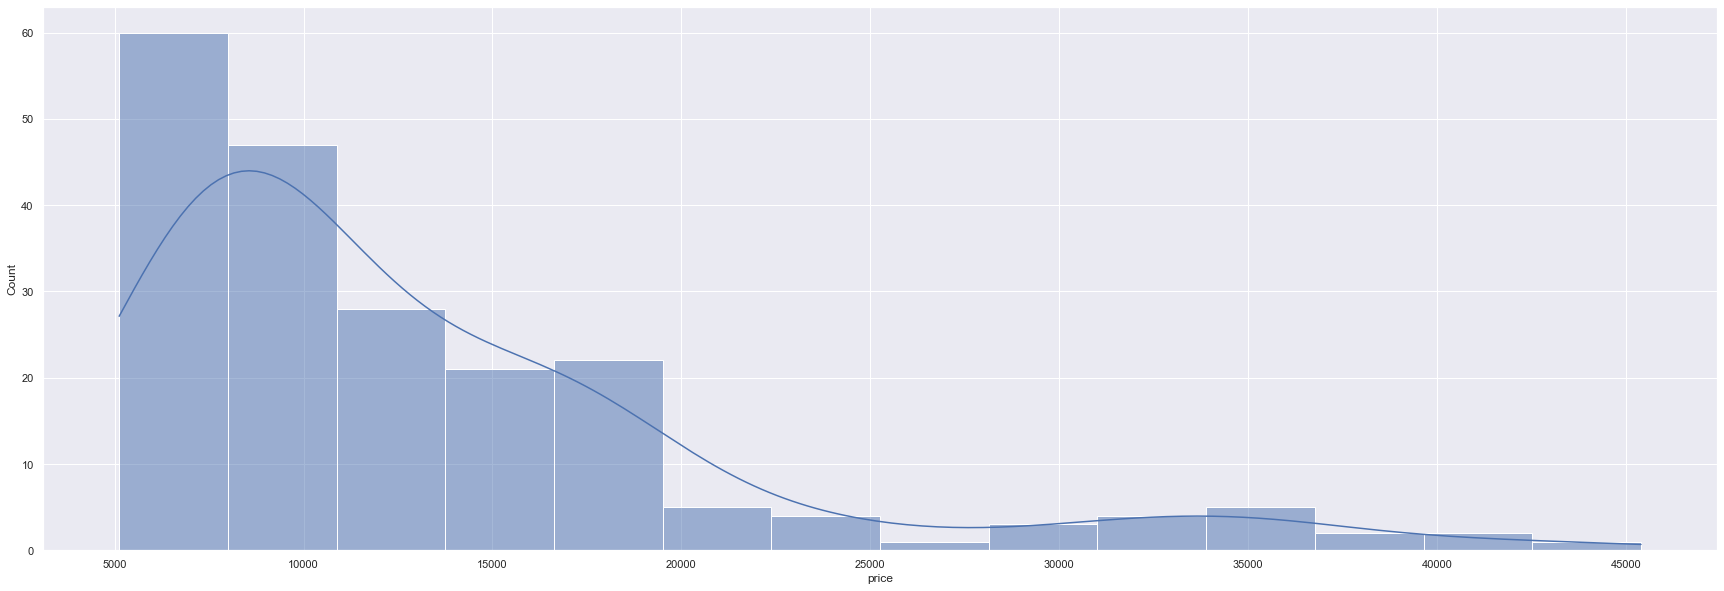

In [16]:
y = df['price']
sns.histplot(data=df, x="price", kde=True)

In [17]:
#Skewed distribution
y=np.log(y)
y=y.values

<AxesSubplot:ylabel='Count'>

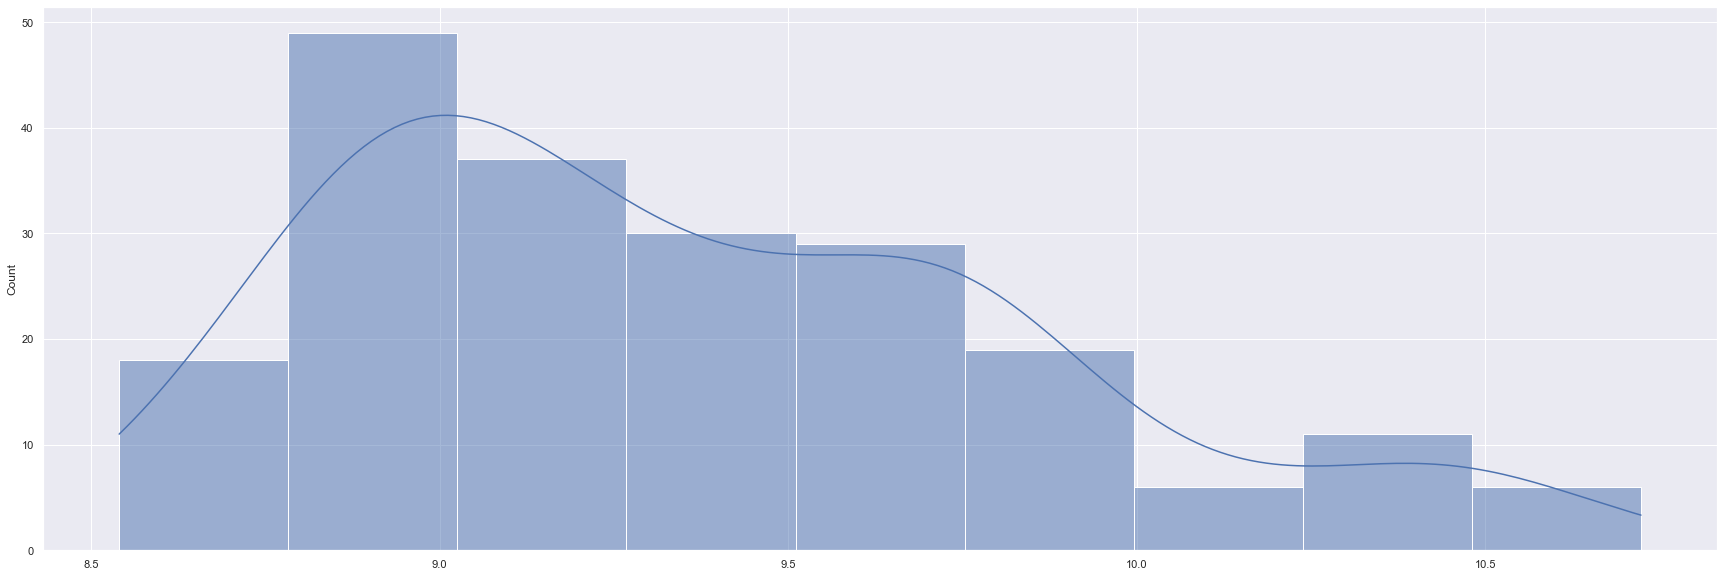

In [18]:
sns.histplot(data=df, x=y, kde=True)

In [19]:
#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

#Scale
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
print(len(x1.columns))
X_train[:, :(len(x1.columns))]= sc.fit_transform(X_train[:, :(len(x1.columns))])
X_test[:, :(len(x1.columns))]= sc.transform(X_test[:, :(len(x1.columns))])

60


In [20]:
#Importing regressors
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#Regression Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor

In [21]:
#Fitting data to regressors

res_r2 = []
res_RMSE = []
res_MSE = []

regressors = {
    'Lasso Regression':Lasso(alpha=0.005),
    'Ridge Regression':Ridge(alpha=0.005),
    'Ridge Regression CV':RidgeCV(alphas=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0)),
    'Random Forest Regressor':RandomForestRegressor(n_estimators=3000, max_depth=10),
    'Decision Tree Regressor':DecisionTreeRegressor(random_state=11),
    'XG Boost Regressor':xgb.XGBRegressor(n_estimators=4000, learning_rate=0.01, max_depth=10, random_state=43),
    'LGBM Regressor':LGBMRegressor(n_estimators=5000, learning_rate=0.08, random_state=10),
    'Ada Boost Regressor':AdaBoostRegressor(base_estimator=RandomForestRegressor(), n_estimators=150, learning_rate=0.1,random_state=1)
}

for key in regressors: 
    print(key)
    regressors[key].fit(X_train, y_train)
    Y_pred = regressors[key].predict(X_test)
    
    #Compute r squared
    r2 = round(r2_score(y_test, Y_pred),4)
    print( 'R2_Score: ', r2)
    res_r2.append(r2)

    #Compute root mean squared error
    rmse = round(mean_squared_error(np.exp(y_test),np.exp(Y_pred), squared=False), 2)
    print("RMSE: ",rmse)
    res_RMSE.append(rmse)
    
    #Compute mean squared error
    mse = round(mean_absolute_error(np.exp(y_test),np.exp(Y_pred)), 2)
    print("MAE: ", mse)
    res_MSE.append(mse)
    
    print('\n\n')

Lasso Regression
R2_Score:  0.9229
RMSE:  2058.57
MAE:  1300.71



Ridge Regression
R2_Score:  0.8986
RMSE:  2350.64
MAE:  1457.42



Ridge Regression CV
R2_Score:  0.9121
RMSE:  2276.96
MAE:  1432.09



Random Forest Regressor
R2_Score:  0.9113
RMSE:  2331.99
MAE:  1559.41



Decision Tree Regressor
R2_Score:  0.8862
RMSE:  2621.58
MAE:  1601.13



XG Boost Regressor
R2_Score:  0.9165
RMSE:  2411.52
MAE:  1445.92



LGBM Regressor
R2_Score:  0.9105
RMSE:  2463.35
MAE:  1477.0



Ada Boost Regressor
R2_Score:  0.9196
RMSE:  2288.96
MAE:  1439.4





In [22]:
len(df)

205

In [23]:
lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train, y_train)
Y_pred = lasso_reg.predict(X_test)

In [24]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [25]:
pd.set_option('display.max_columns', 500)

In [26]:
cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg']
new_data = ['nissan', 'petrol', 'std', 'four', 'sedan', 'rwd', 'front', 85, 168.8, 64.1, 50, 2824, 'dohc', 'four', 130, 'mpfi', 3, 100, 17, 26]
print(len(cols)==len(new_data))

#Check if string data is catgorical
ind = []
for i in range(len(new_data)): 
    if type(new_data[i]) ==  str: 
        ind.append(cols[i]) 

print(ind == categorical)

True
True


In [27]:
#Transform new input
new_data_df = pd.DataFrame([new_data],columns = cols)

In [28]:
#Transform data to fit model
def transform(data):
    #Columns of the df
    cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg']

    new_df = pd.DataFrame([data],columns = cols)
    #print(new_df)

    cat = []
    num = []
    for col in new_df.columns: 
        if new_df[col].dtypes == 'object': 
            cat.append(col)
        else: 
            num.append(col)
    #print(cat)
    #print(num)
    x1_new = pd.get_dummies(new_df[cat], drop_first = False)
    #print(x1_new)
    x2_new = new_df[num]
    #print(x2_new)
    X_new = pd.concat([x2_new,x1_new], axis = 1)
    #print(X_new)

    final_df = pd.DataFrame(columns = cols_to_use)
    final_df = pd.concat([final_df, X_new])
    final_df = final_df.fillna(0)
    #print(final_df)

    X_new = final_df.values
    #print(X_new)
    
    
    X_new[:, :(len(x1.columns))]= sc.transform(X_new[:, :(len(x1.columns))])

    output = lasso_reg.predict(X_new)
    print(np.exp(output))

    
new_data = ['volkswagen', 'gas', 'std', 'four', 'sedan', 'rwd', 'front', 80, 150, 64.1, 50, 1500, 'dohc', 'four', 130, 'mpfi', 3, 150, 17, 26]
transform(new_data)

[8407.43384067]


In [29]:
df.head()
#sns.countplot(data=df, x='fueltype')
df.groupby('enginelocation').count()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
enginelocation,,,,,,,,,,,,,,,,,,,,
front,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
rear,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [30]:
pickle.dump(lasso_reg, open('model.pkl','wb'))

In [31]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [32]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


In [33]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

<AxesSubplot:xlabel='enginetype', ylabel='count'>

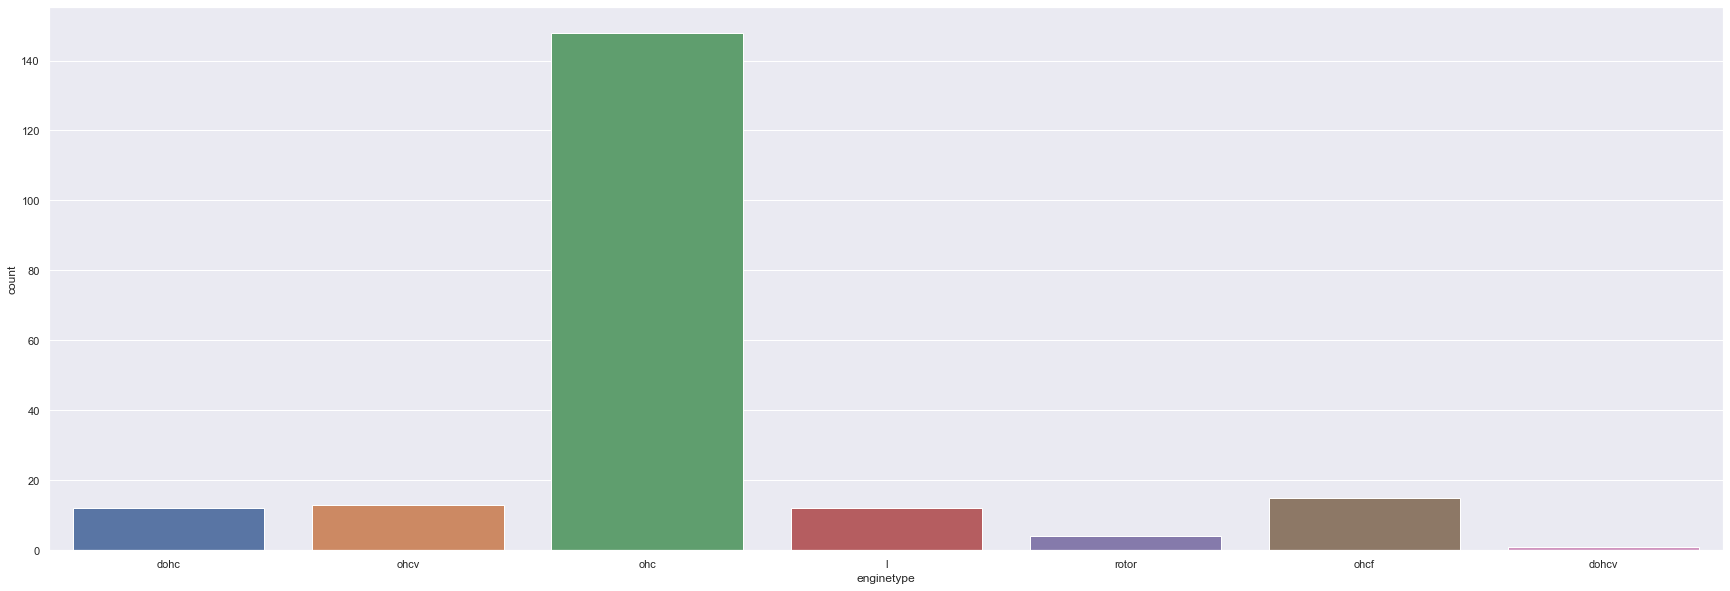

In [34]:
sns.countplot(data = df, x = 'enginetype')

In [35]:
cols_to_use

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'CarName_alfa-romero', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_

In [36]:
df.to_csv('df_columns')